### CIFAR-10 Image Classification Using CNN

#### Import Libraries and Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
# 50000 is the number of samples, 32 is the width, 32 is the length
# and 3 is due to 3 channels for RGB values
X_train.shape

(50000, 32, 32, 3)

#### Visualizing Data

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


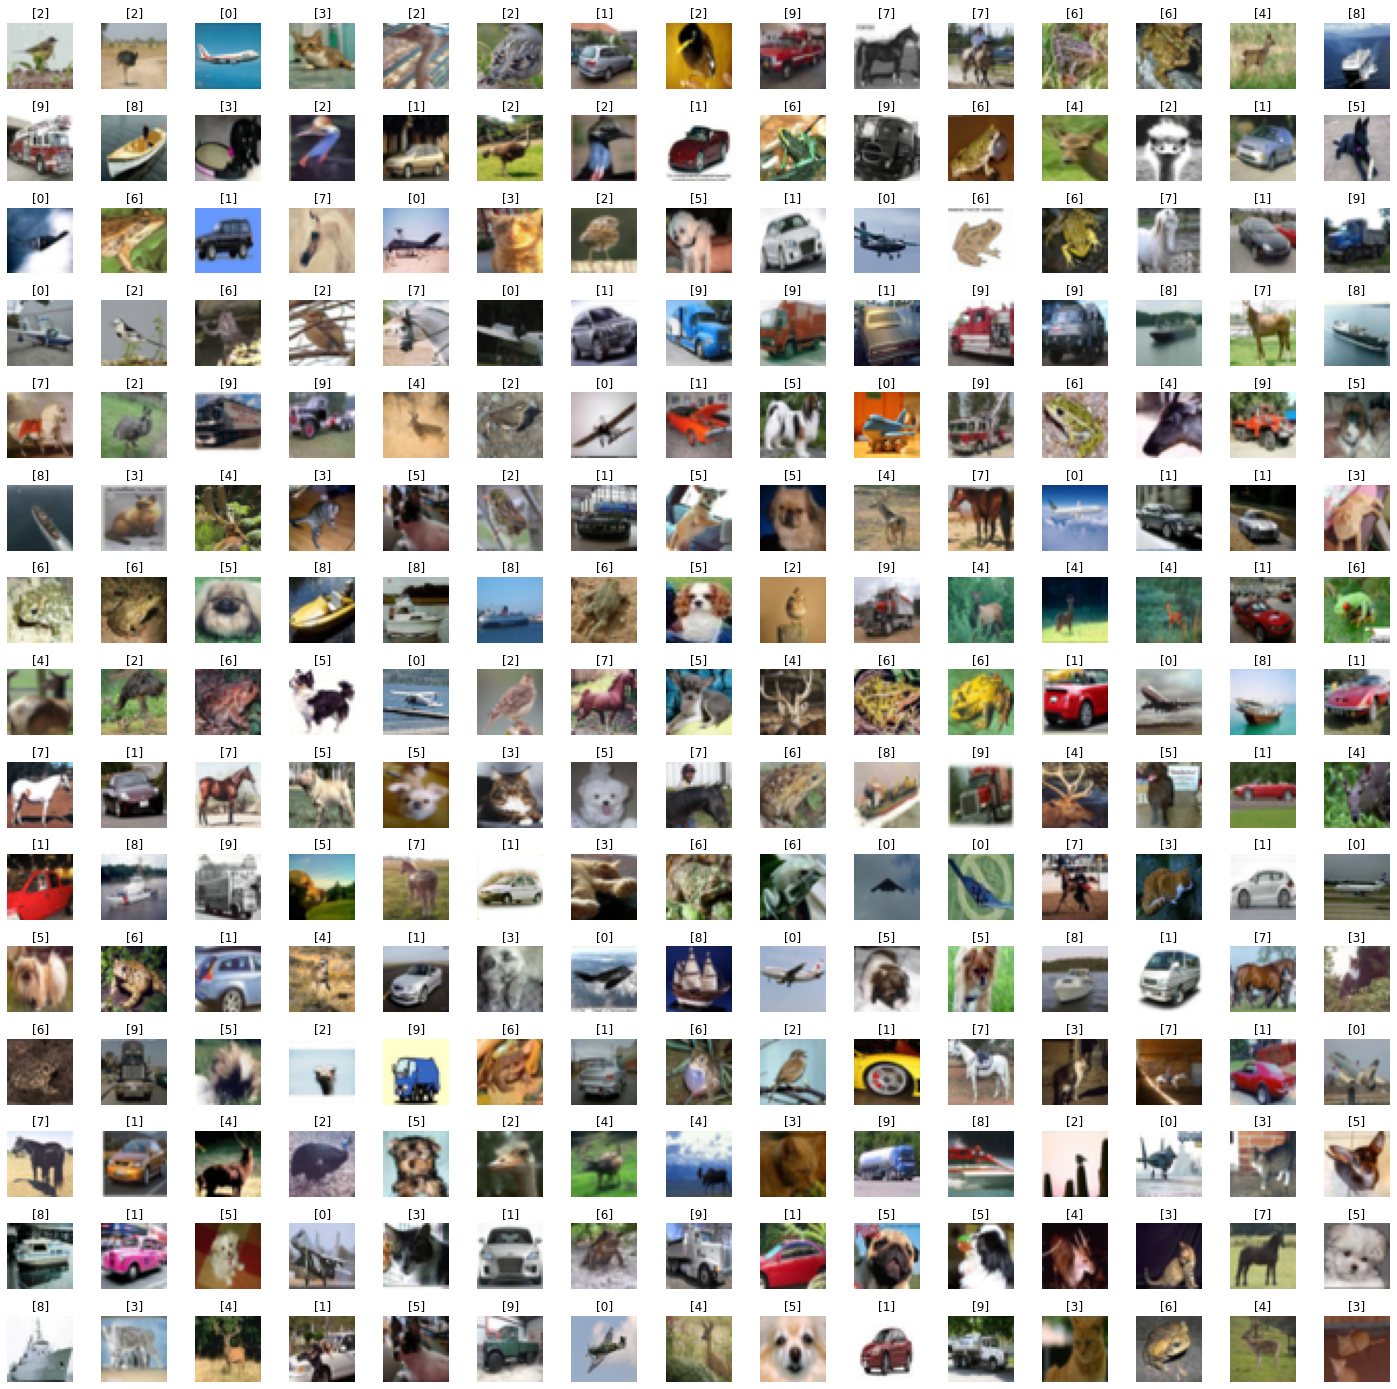

In [4]:
# Since I want to visualize 15 by 15 images, I have defined these variables
W_grid = 15
L_grid = 15

# Creating a subplot that allows me to view 225 images of size 25 * 25
fig, axes = plt.subplots(L_grid, W_grid, figsize=(25, 25))
axes = axes.ravel()

n_training = len(X_train)

# Populating the subplots with random images from training data set
# and their classification
for i in np.arange(L_grid * W_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')

# Providing some space for a cleaner look
plt.subplots_adjust(hspace = 0.4)

#### Preparing Data

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [6]:
number_cat = 10

In [7]:
# We are converting the decimal values into binary values to get
# appropriate output neurons to fire

import keras
y_train = keras.utils.to_categorical(y_train, number_cat)
y_test = keras.utils.to_categorical(y_test, number_cat)

In [8]:
X_train = X_train/255
X_test = X_test/255

In [13]:
Input_shape = X_train.shape[1:]

(32, 32, 3)

#### Training the Model

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [16]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())

cnn_model.add(Dense(units=512, activation='relu'))
cnn_model.add(Dense(units=512, activation='relu'))

cnn_model.add(Dense(units=10, activation='softmax'))

In [19]:
cnn_model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(lr=0.001), metrics=['accuracy'])

In [20]:
history = cnn_model.fit(X_train, y_train, batch_size=32, epochs=2, shuffle=True)

Epoch 1/2
1563/1563 [==============================] - 98s 62ms/step - loss: 1.7693 - accuracy: 0.3476
Epoch 2/2
1563/1563 [==============================] - 98s 63ms/step - loss: 1.1801 - accuracy: 0.5878


#### Evaluating the Model

In [21]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 3s 10ms/step - loss: 0.9812 - accuracy: 0.6570
Test Accuracy: 0.6570000052452087


In [28]:
predicted_classes = cnn_model.predict_classes(X_test)

In [32]:
y_test = y_test.argmax(1)

array([3, 8, 8, ..., 5, 1, 7])

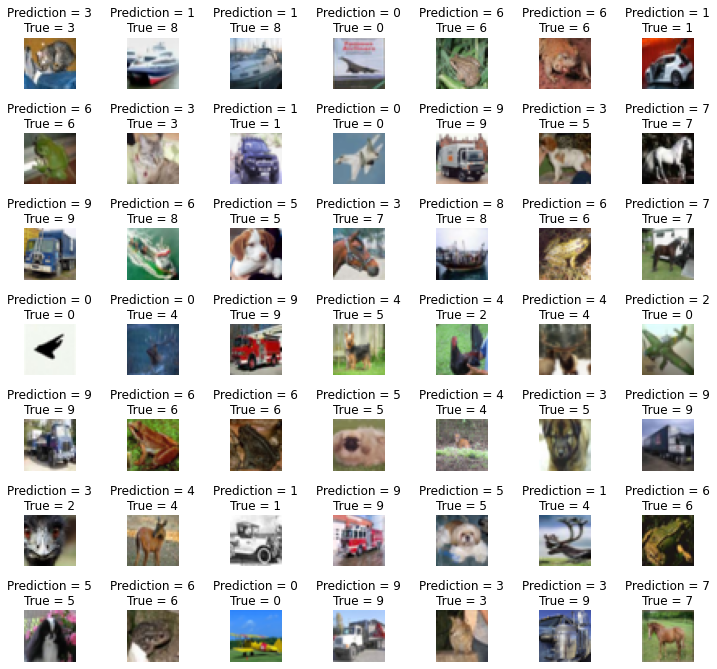

In [33]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\nTrue = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

<AxesSubplot:>

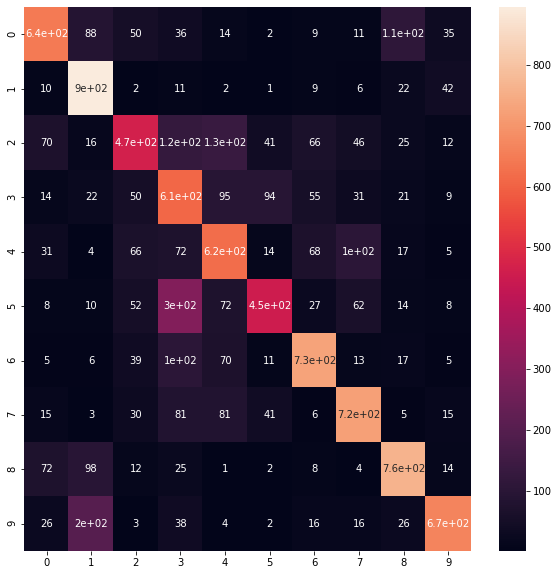

In [35]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)